## Average cost of undergraduate student by state USA 
## 미국 주별 학부생 평균 비용

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
education = pd.read_csv('./datasets/nces330_20.csv')

- target :  value 수치 예측 문제

```
Year 연도

State 주

Type 대학 유형

Length 종류

Expense 생활비용 Fees/Tuition:수업료/수수료, Room/Board:숙식제공하는 기숙사 

Value 값 평균 비용

```

In [4]:
education

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [5]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [6]:
# 수치형 특성 탐색

In [8]:
education.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [6]:
#null값 확인
education.isnull().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64

In [7]:
education.columns

Index(['Year', 'State', 'Type', 'Length', 'Expense', 'Value'], dtype='object')

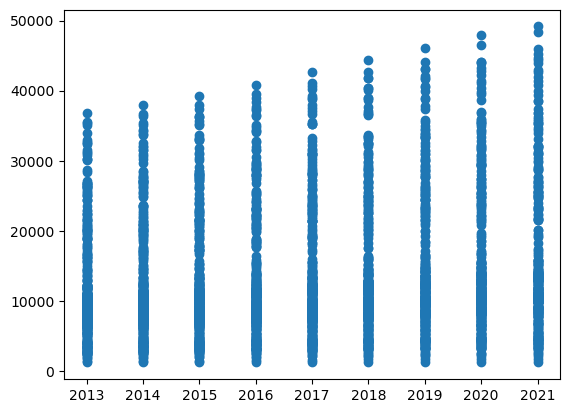

In [11]:
# 연도별 총 평균 학비 추이
plt.scatter(education.Year,education.Value)
plt.show()

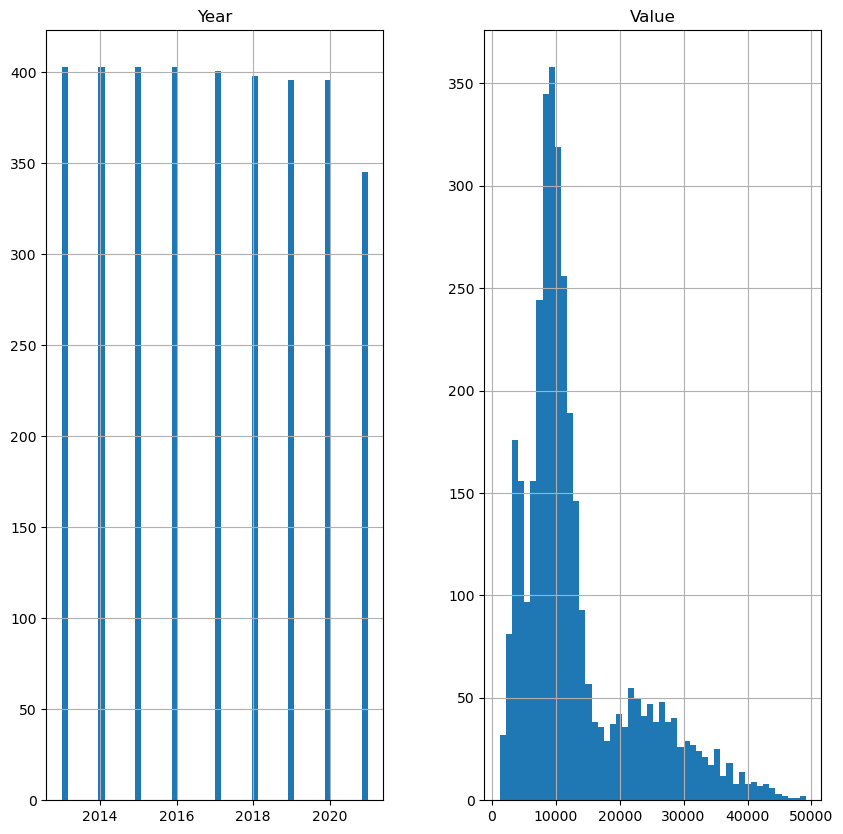

In [11]:
education.hist(bins=50, figsize=(10, 10))
plt.show()

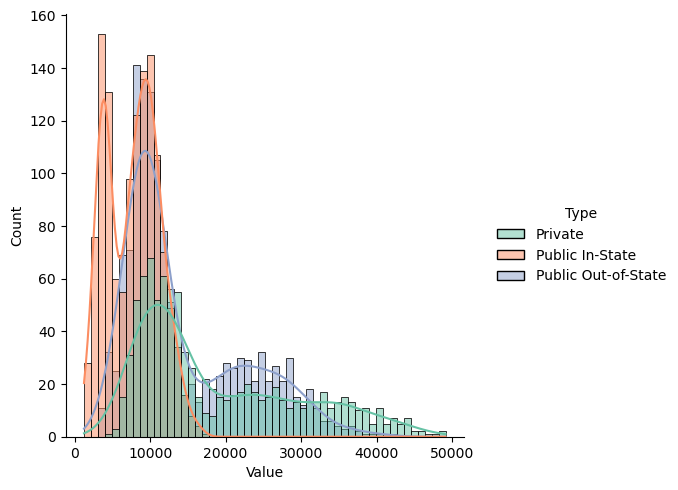

In [12]:
# 사립 공립 별 가격 추이 /공립이 저렴하고 사립이 비싸다
# 주내와 주외의 학생 가격도 다름
sns.displot(data=education, kde=True, x='Value', hue='Type',palette='Set2')
plt.show()
#사립 또는 공립, 주 내 또는 주 외부.

In [13]:
education.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [14]:
education['State'].value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

In [15]:
education['Value'].value_counts()

10043    8
8216     5
11492    5
9586     5
10300    5
        ..
6006     1
7064     1
3108     1
6915     1
14710    1
Name: Value, Length: 2861, dtype: int64

In [8]:
#시각화 표현 지도
education.groupby('State')['Value'].mean()

State
Alabama                 11362.732394
Alaska                  11629.174603
Arizona                 11195.957746
Arkansas                10233.816901
California              15196.647887
Colorado                13517.126761
Connecticut             17435.211268
Delaware                13834.622951
District of Columbia    18880.200000
Florida                 11356.098592
Georgia                 12563.000000
Hawaii                  12524.309859
Idaho                    8609.197183
Illinois                15167.633803
Indiana                 14066.450704
Iowa                    12403.718310
Kansas                  10589.464789
Kentucky                12941.281690
Louisiana               13355.577465
Maine                   14378.971831
Maryland                15332.323944
Massachusetts           17282.098592
Michigan                13881.816901
Minnesota               12642.295775
Mississippi              9657.126761
Missouri                11174.746479
Montana                 11658.94

<AxesSubplot:xlabel='Value', ylabel='State'>

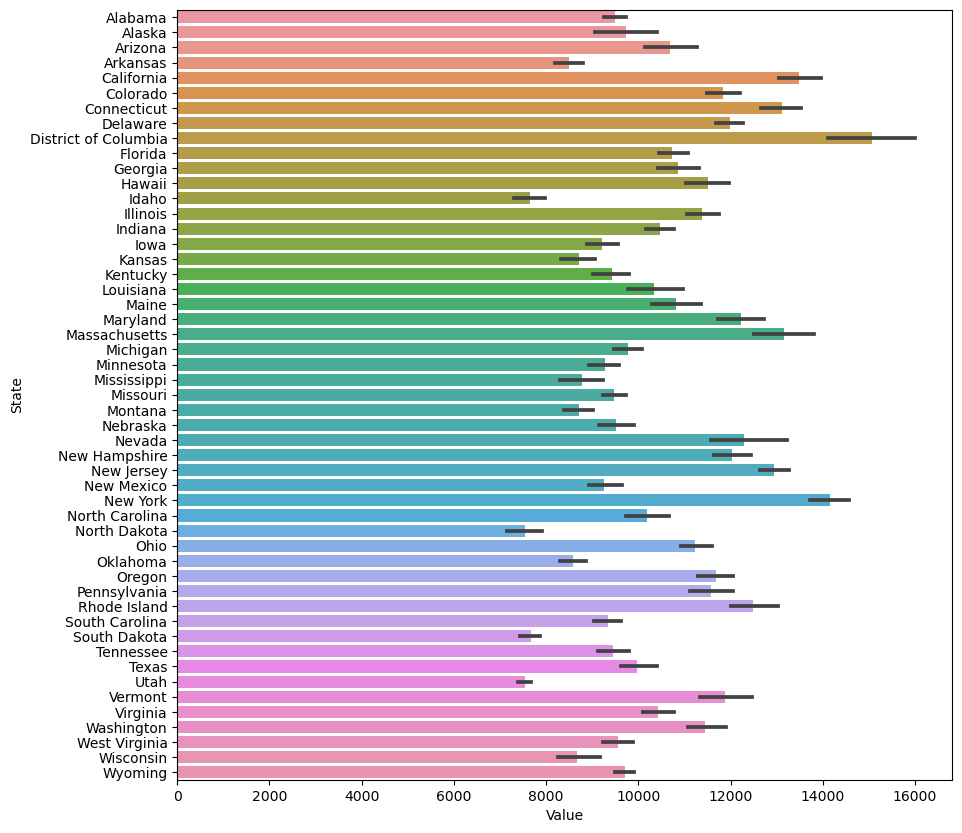

In [18]:
#Room/Board인 주 별 비용 값
play=education.groupby(['State','Expense']).mean()

e = education['Expense'] == 'Room/Board'

a = education[e]

plt.figure(figsize=(10, 10))
sns.barplot( x =a.Value, y = a.State )

In [30]:
a = education[edu]
a

,Year,State,Type,Length,Expense,Value
1,2013,Alabama,Private,4-year,Room/Board,8503
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
7,2013,Alabama,Public Out-of-State,4-year,Room/Board,8473
9,2013,Alaska,Private,4-year,Room/Board,8923
12,2013,Alaska,Public In-State,4-year,Room/Board,9098
...,...,...,...,...,...,...
3537,2021,Wisconsin,Private,4-year,Room/Board,11389
3539,2021,Wisconsin,Public In-State,4-year,Room/Board,9093
3542,2021,Wisconsin,Public Out-of-State,4-year,Room/Board,9093
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799


<AxesSubplot:xlabel='Value', ylabel='State'>

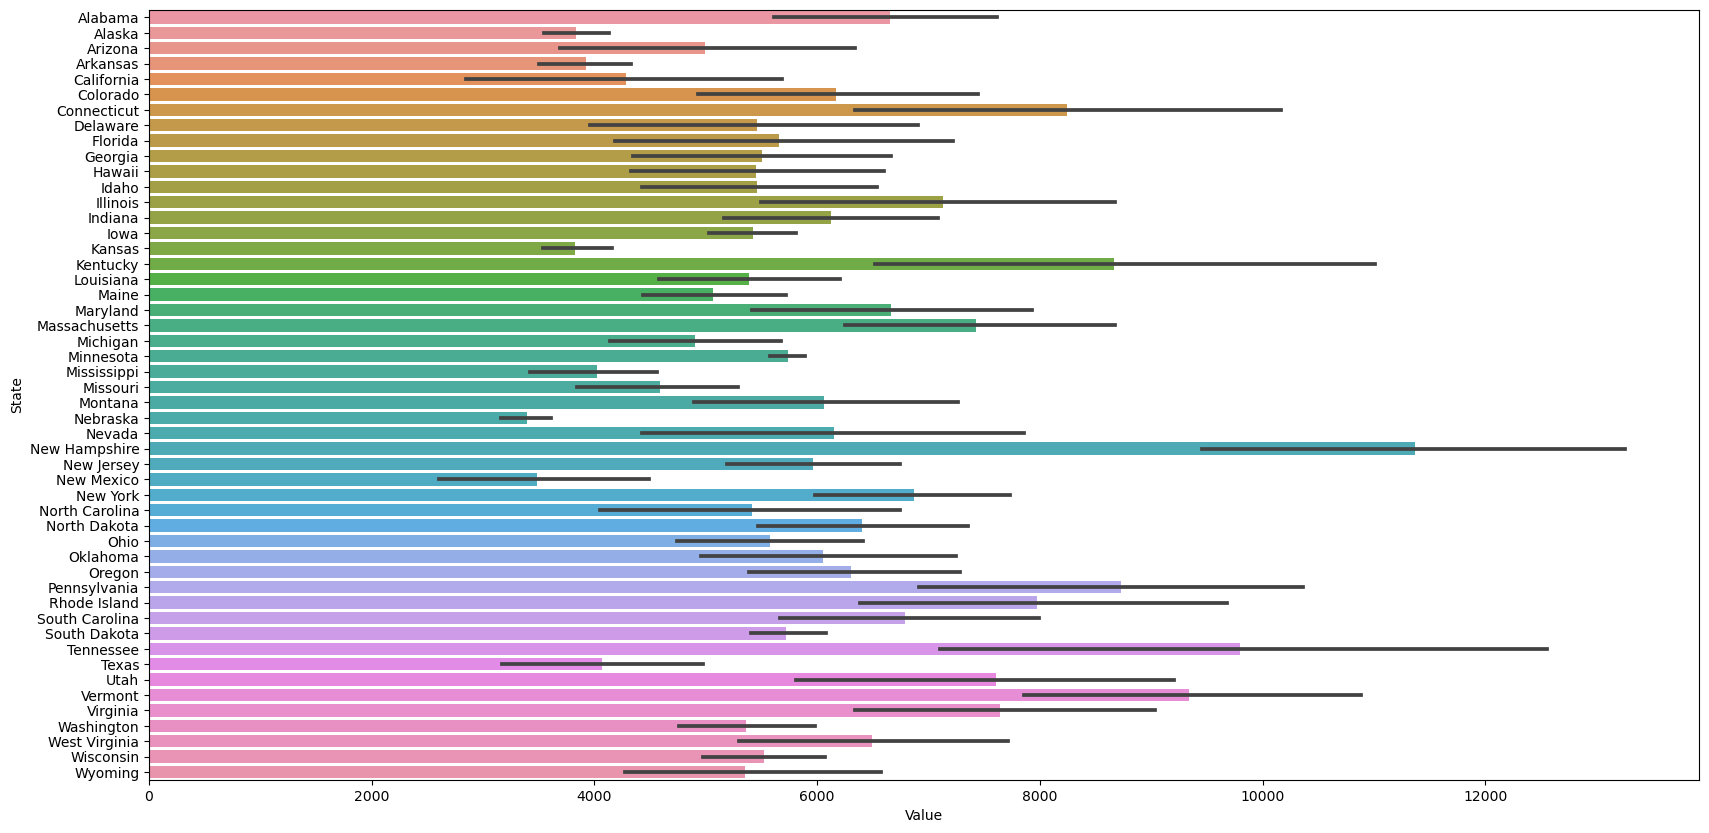

In [19]:
play=education.groupby(['State','Expense']).mean()

edu = (education['Expense'] == 'Fees/Tuition') & (education['Length'] == '4-year') # 생활비 : 수강료/수업료 4년제
edu2 = (education['Expense'] == 'Fees/Tuition') & (education['Length'] == '2-year') #생활비 : 수강료/수업료 2년제

a = education[edu]
b = education[edu2]

plt.figure(figsize=(20, 10))

sns.barplot(y=b.State, x=b.Value)

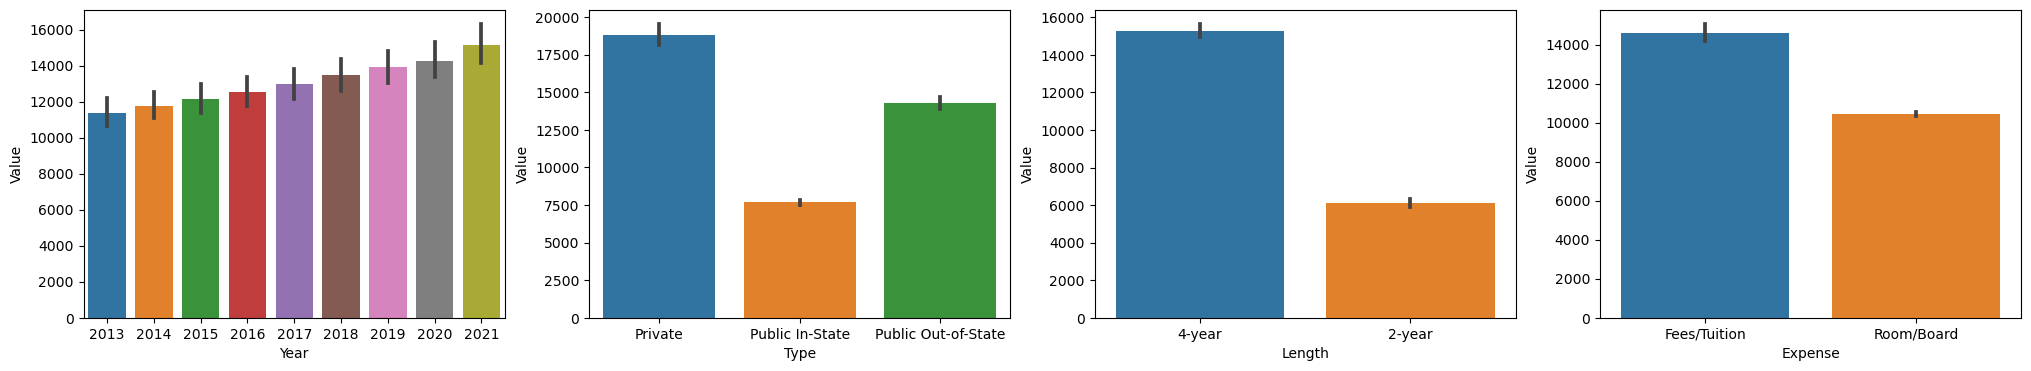

In [52]:
cat_columns = ['Year','Type','Length','Expense']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 4))
for i, column in enumerate(cat_columns):
    sns.barplot(data=education, x=column, y='Value', ax=axes[i])
plt.show()

In [59]:
education

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [21]:
pred_value = education['Value']

In [22]:
X = education.drop('Value', axis=1)
y = education['Value']

In [23]:
X.shape ,y.shape

((3548, 5), (3548,))

In [24]:
X,y

(      Year    State                 Type  Length       Expense
 0     2013  Alabama              Private  4-year  Fees/Tuition
 1     2013  Alabama              Private  4-year    Room/Board
 2     2013  Alabama      Public In-State  2-year  Fees/Tuition
 3     2013  Alabama      Public In-State  4-year  Fees/Tuition
 4     2013  Alabama      Public In-State  4-year    Room/Board
 ...    ...      ...                  ...     ...           ...
 3543  2021  Wyoming      Public In-State  2-year  Fees/Tuition
 3544  2021  Wyoming      Public In-State  4-year    Room/Board
 3545  2021  Wyoming  Public Out-of-State  2-year  Fees/Tuition
 3546  2021  Wyoming  Public Out-of-State  4-year  Fees/Tuition
 3547  2021  Wyoming  Public Out-of-State  4-year    Room/Board
 
 [3548 rows x 5 columns],
 0       13983
 1        8503
 2        4048
 3        8073
 4        8473
         ...  
 3543     3987
 3544     9799
 3545     9820
 3546    14710
 3547     9799
 Name: Value, Length: 3548, dtype: int6

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [44]:
import sklearn

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [46]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lin_scores = cross_val_score(lin_reg,X, y, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
lin_rmse = np.sqrt(-lin_scores.mean())
lin_rmse

C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\Playdata\Anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Playdata\A

nan

In [47]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse = np.sqrt(-tree_scores.mean())
tree_rmse

NameError: name 'housing_prepared' is not defined